# Plot grafs
Import functions and load data

In [33]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
%matplotlib inline

In [36]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from scipy import signal
from datetime import datetime
import My_functions_v2 as my
IPython_default = plt.rcParams.copy()

In [ ]:
import seaborn as sns
sns.set()

In [86]:
plt.rcParams.update({'font.size': 16})

## Data

In [122]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_dual.pkl')
FAC = my.add_NaN_gap(FAC)

In [107]:
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')
DNS = my.add_NaN_gap(DNS)

## Plot initial

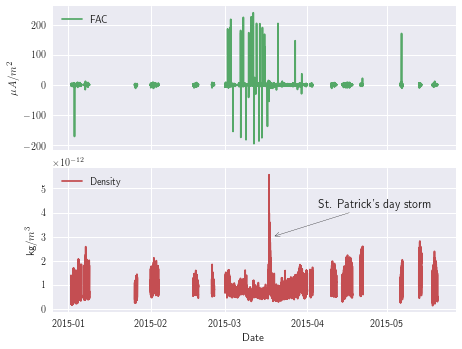

In [92]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax2 = fig.add_axes([0.1, height/2+0.15, width, height/2],xticklabels=[],ylabel='$\mu A / m^2$')
ax3 = fig.add_axes([0.1, 0.1, width, height/2],ylabel=' kg$/ m^3$',xlabel='Date')
                   

ax2.plot(FAC.index.values,FAC.FAC.values,color=sns.color_palette()[1],label='FAC')
ax3.plot(DNS.index.values,DNS.Density.values,color=sns.color_palette()[2],label='Density')

ax3.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,19), 3*10**-12),  xycoords='data',
            xytext=(datetime(2015, 4,5), 4.2*10**-12), textcoords='data',
            arrowprops=dict(arrowstyle="->"))


ax2.legend(loc=2)
ax3.legend(loc=2)
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/initial_data.jpg')

### plot Filter FAC 

In [124]:
Flag_idx = (FAC.Flags_q>440404) | (FAC.Flags_B>10002)
filter_fac = FAC.FAC.copy().values
filter_fac[Flag_idx] = float('Nan')

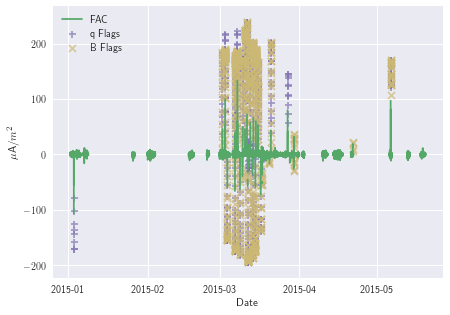

In [82]:
plt.figure( figsize=(7,5 ))

plt.plot(FAC.index.values,filter_fac,color=sns.color_palette()[1],label='FAC')
plt.scatter(FAC[(FAC.Flags_q>440404)].index.values,FAC[(FAC.Flags_q>440404)].FAC.values,marker='+', 
            color=sns.color_palette()[3],label='q Flags',alpha=0.7)
plt.scatter(FAC[(FAC.Flags_B>10002)].index.values,FAC[(FAC.Flags_B>10002)].FAC.values, marker='x',
            color=sns.color_palette()[4],label='B Flags',alpha=0.7)

plt.legend(loc=2)
plt.ylabel('$\mu$A/$m^2$')
plt.xlabel('Date')
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/FAC_flags.jpg')

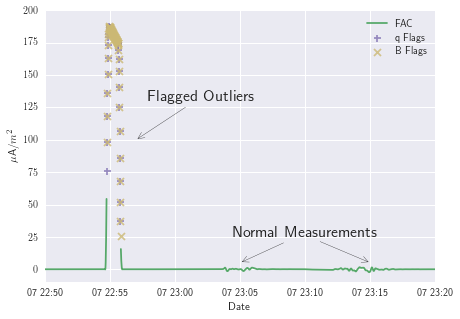

In [125]:

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(7,5 ))

ax.plot(FAC.index.values,filter_fac,color=sns.color_palette()[1],label='FAC')
ax.scatter(FAC[(FAC.Flags_q>440404)].index.values,FAC[(FAC.Flags_q>440404)].FAC.values,marker='+', 
            color=sns.color_palette()[3],label='q Flags',alpha=0.8)
ax.scatter(FAC[(FAC.Flags_B>10002)].index.values,FAC[(FAC.Flags_B>10002)].FAC.values, marker='x',
            color=sns.color_palette()[4],label='B Flags',alpha=0.8)

ax.annotate("Flagged Outliers", xy=(datetime(2015, 3,7,22,57), 100),  xycoords='data',
            xytext=(datetime(2015, 3,7,23,2),130), textcoords='data', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("", xy=(datetime(2015, 3,7,23,15), 5),  xycoords='data',
            xytext=(datetime(2015, 3,7,23,11),22), textcoords='data', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Normal Measurements", xy=(datetime(2015, 3,7,23,5), 5),  xycoords='data',
            xytext=(datetime(2015, 3,7,23,10),25), textcoords='data', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.legend()
ax.set_ylabel('$\mu$A/$m^2$')
ax.set_xlabel('Date')
ax.set_xlim([datetime(2015, 3,7,22,50), datetime(2015, 3, 7,23,20)])
ax.set_ylim([-10, 200])
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/FAC_flags_zoomed.jpg')

In [3]:
FAC_filter = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
FAC_filter = my.add_NaN_gap(FAC_filter)

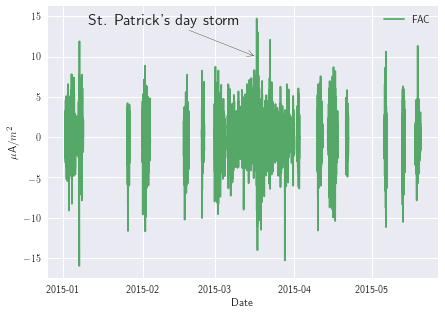

In [4]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(7,5 ))

ax.plot(FAC_filter.index.values,FAC_filter.FAC.values,color=sns.color_palette()[1],label='FAC')

ax.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,17), 10),  xycoords='data',
            xytext=(datetime(2015, 1,11), 14), textcoords='data',
            arrowprops=dict(arrowstyle="->"))

ax.legend()
ax.set_ylabel('$\mu$A/$m^2$')
ax.set_xlabel('Date')

plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/FAC_filter.jpg')

### Normalization Factors 

In [113]:
DNS=DNS.dropna(how='any')
nFactors = np.genfromtxt('/home/simon/Desktop/Bachelor_project/data/normalization_factors.csv', delimiter=',')
omni = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/omni.pkl')
omni = omni.reindex(DNS.index,method='ffill')

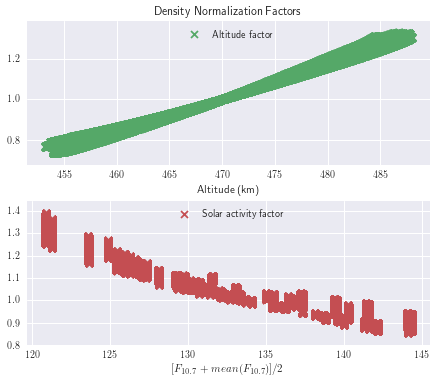

In [121]:
plt.rcParams.update({'font.size': 12})
solar = (omni.F10_INDEX.values+omni.F10_Mean.values)/2

fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax2 = fig.add_axes([0.1, height/2+0.2, width, height/2],xlabel='Altitude (km)') #$(\text{F}_{10.7}+\Bar{\text{F}}_{10.7})/2$
ax3 = fig.add_axes([0.1, 0.1, width, height/2],xlabel='$[F_{10.7}+mean({F}_{10.7})]/2$')
                   

ax2.scatter(DNS.Altitude.values/1000,nFactors[:,0],color=sns.color_palette()[1],label='Altitude factor',marker='x')
ax3.scatter(solar, nFactors[:,1],color=sns.color_palette()[2],label='Solar activity factor',marker='x')


ax2.legend(loc=9)
ax3.legend(loc=9)
ax2.set_title('Density Normalization Factors')
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Normalization_factors.jpg')

### plot Half orbit means

In [5]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')
Half_orbit  = my.add_NaN_gap(Half_orbit )

In [6]:
Half_orbit.head()

,Density_norm,FAC,FAC_power,Density,Altitude,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BY_GSM,BZ_GSM,Bulk_speed,F10_Mean,PyAmps
2015-01-02 00:50:50,5.932167e-13,0.104478,0.284759,6.468488e-13,464222.287865,1.0,1.0,15.0,3.0,141.0,-1.0,-2.1,433.0,129.029218,1.769016
2015-01-02 01:37:45,7.720531e-13,0.139248,0.372618,6.987142e-13,475492.964700,1.0,-1.0,15.0,3.0,141.0,-0.6,-1.7,433.0,129.032511,2.962752
2015-01-02 02:24:40,5.577984e-13,0.113231,0.390340,6.089699e-13,464224.157119,2.0,1.0,15.0,3.0,141.0,-2.2,-2.4,434.0,129.035803,1.880936
2015-01-02 03:11:35,7.597623e-13,0.181961,0.565810,6.858343e-13,475506.057772,2.0,-1.0,4.0,1.0,141.0,-3.0,-2.3,433.0,129.039095,4.111182
2015-01-02 03:58:30,5.691719e-13,0.075313,0.165567,6.237317e-13,464035.397442,3.0,1.0,4.0,1.0,141.0,-3.0,-2.3,433.0,129.039095,1.841245


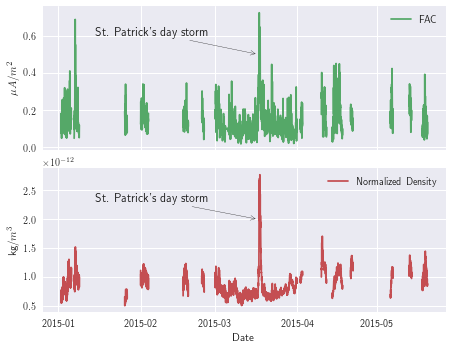

In [7]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax2 = fig.add_axes([0.1, height/2+0.15, width, height/2],xticklabels=[],ylabel='$\mu A / m^2$')
ax3 = fig.add_axes([0.1, 0.1, width, height/2],ylabel=' kg$/ m^3$',xlabel='Date')
                   

ax2.plot(Half_orbit.index.values,Half_orbit.FAC.values,color=sns.color_palette()[1],label='FAC')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

ax2.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,17), 0.5),  xycoords='data',
             xytext=(datetime(2015, 1,15),0.6), textcoords='data',
             arrowprops=dict(arrowstyle="->"))

#ax3.plot(Half_orbit.index.values,Half_orbit.Density.values,color=sns.color_palette()[2],label='Density')
ax3.plot(Half_orbit.index.values,Half_orbit.Density_norm.values,color=sns.color_palette()[2],label='Normalized Density')

ax3.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,17), 2*10**-12),  xycoords='data',
             xytext=(datetime(2015, 1,15), 2.3*10**-12), textcoords='data',
             arrowprops=dict(arrowstyle="->"))


ax2.legend(loc=1)
ax3.legend(loc=1)

plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Half_orbit.jpg')

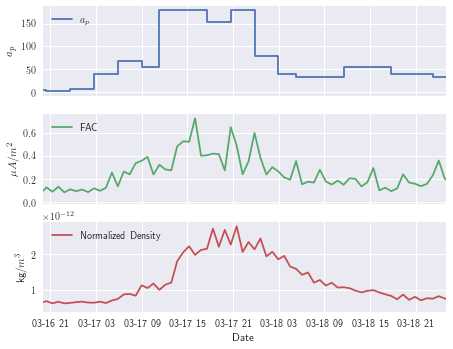

In [8]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax1 = fig.add_axes([0.1, 0.7, width, 0.25],xticklabels=[],ylabel='$a_p$')
ax2 = fig.add_axes([0.1, 0.4, width, 0.25],xticklabels=[],ylabel='$\mu A / m^2$')
ax3 = fig.add_axes([0.1, 0.1, width, 0.25],ylabel=' kg$/ m^3$',xlabel='Date')
                   
ax1.plot(Half_orbit.index.values,Half_orbit.AP_INDEX.values,color=sns.color_palette()[0],label='$a_p$',drawstyle='steps')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

ax2.plot(Half_orbit.index.values,Half_orbit.FAC.values,color=sns.color_palette()[1],label='FAC')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

#ax3.plot(Half_orbit.index.values,Half_orbit.Density.values,color=sns.color_palette()[2],label='Density')
ax3.plot(Half_orbit.index.values,Half_orbit.Density_norm.values,color=sns.color_palette()[2],label='Normalized Density')

#ax3.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,19), 3*10**-12),  xycoords='data',
#            xytext=(datetime(2015, 4,5), 4.2*10**-12), textcoords='data',
#            arrowprops=dict(arrowstyle="->"))


ax1.legend(loc=2)
ax2.legend(loc=2)
ax3.legend(loc=2)
ax1.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])
ax2.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])
ax3.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])

plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Half_orbit_storm.jpg')

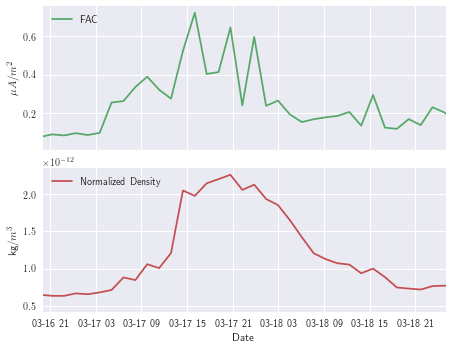

In [144]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax1 = fig.add_axes([0.1, 0.7, width, 0.25],xticklabels=[],ylabel='$K_p$')
ax2 = fig.add_axes([0.1, 0.4, width, 0.25],xticklabels=[],ylabel='$\mu A / m^2$')
ax3 = fig.add_axes([0.1, 0.1, width, 0.25],ylabel=' kg$/ m^3$',xlabel='Date')
                   
ax1.plot(Half_orbit[Half_orbit.Hemisphere==1].index.values,Half_orbit[Half_orbit.Hemisphere==1].FAC.values,color=sns.color_palette()[1],label='FAC')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

ax2.plot(Half_orbit[Half_orbit.Hemisphere==1].index.values,Half_orbit[Half_orbit.Hemisphere==1].FAC.values,color=sns.color_palette()[1],label='FAC')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

#ax3.plot(Half_orbit.index.values,Half_orbit.Density.values,color=sns.color_palette()[2],label='Density')
ax3.plot(Half_orbit[Half_orbit.Hemisphere==1].index.values,Half_orbit[Half_orbit.Hemisphere==1].Density_norm.values,color=sns.color_palette()[2],label='Normalized Density')

#ax3.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,19), 3*10**-12),  xycoords='data',
#            xytext=(datetime(2015, 4,5), 4.2*10**-12), textcoords='data',
#            arrowprops=dict(arrowstyle="->"))


ax1.legend(loc=2)
ax2.legend(loc=2)
ax3.legend(loc=2)
ax1.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])
ax2.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])
ax3.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])

plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Half_orbit_storm_N.jpg')

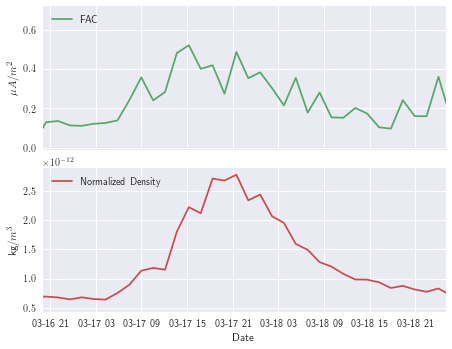

In [145]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure( figsize=(7,5 ))
width = 0.8
height = 0.8
ax2 = fig.add_axes([0.1, height/2+0.15, width, height/2],xticklabels=[],ylabel='$\mu A / m^2$')
ax3 = fig.add_axes([0.1, 0.1, width, height/2],ylabel=' kg$/ m^3$',xlabel='Date')
                   

ax2.plot(Half_orbit[Half_orbit.Hemisphere==-1].index.values,Half_orbit[Half_orbit.Hemisphere==-1].FAC.values,color=sns.color_palette()[1],label='FAC')
#ax2.plot(Half_orbit.index.values,Half_orbit.FAC_power.values,color=sns.color_palette()[0],label='RMS FAC')

#ax3.plot(Half_orbit.index.values,Half_orbit.Density.values,color=sns.color_palette()[2],label='Density')
ax3.plot(Half_orbit[Half_orbit.Hemisphere==-1].index.values,Half_orbit[Half_orbit.Hemisphere==-1].Density_norm.values,color=sns.color_palette()[2],label='Normalized Density')

#ax3.annotate("St. Patrick's day storm", xy=(datetime(2015, 3,19), 3*10**-12),  xycoords='data',
#            xytext=(datetime(2015, 4,5), 4.2*10**-12), textcoords='data',
#            arrowprops=dict(arrowstyle="->"))


ax2.legend(loc=2)
ax3.legend(loc=2)
ax2.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])
ax3.set_xlim([datetime(2015, 3,16,20,0), datetime(2015, 3,19,1,0)])

plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Half_orbit_storm_S.jpg')

### Colormap plot

In [37]:
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS_normalized.pkl')
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')

In [38]:
plt.rcParams.update(IPython_default);

In [39]:
DNS_Z,DNS_index,DNS_dates,DNS_orbit = my.Color_map(DNS,'2015-03-15-02',61,'mLatitude')

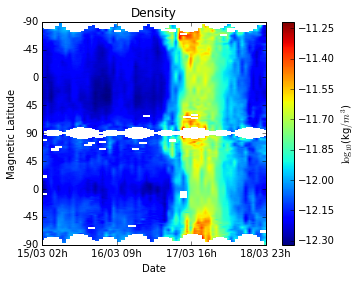

In [47]:
plt.figure()

# Formate the dates to a string
fig_date_str = DNS_dates.strftime('%d/%m %Hh')

# Plot the data
plt.imshow(np.log10(DNS_Z), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
bar = plt.colorbar()
bar.set_label('$\log_{10}$(kg$/ m^3$)')
# Set the ticks and labels...
# Create x labes
x_labels = fig_date_str[::20]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%20)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

# Create y labes
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel('Magnetic Latitude')


plt.title('Density')
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Color_map_Density.jpg',dpi=600)

In [41]:
FAC_Z,FAC_index,FAC_dates,FAC_orbit = my.Color_map(FAC,'2015-03-15-02',61,'mLatitude',30,'20s')

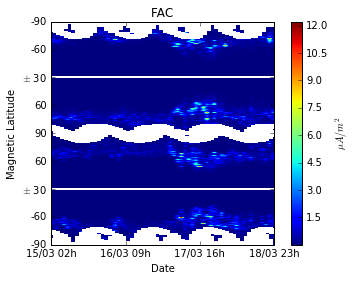

In [48]:
fig, ax = plt.subplots()

fig_date_str = FAC_dates.strftime('%d/%m %Hh')

plt.imshow(FAC_Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
bar = plt.colorbar()
bar.set_label('$\mu A / m^2$')
# Set the ticks and labels...
x_labels = fig_date_str[::20]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%20)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel('Magnetic Latitude')


plt.title('FAC')
plt.savefig('/home/simon/Desktop/Bachelor_project/figures/from_code/Color_map_FAC.jpg',dpi=600)

## Geomagnetic active periods

In [26]:
plt.savefig?

<IPython.core.display.Javascript object>


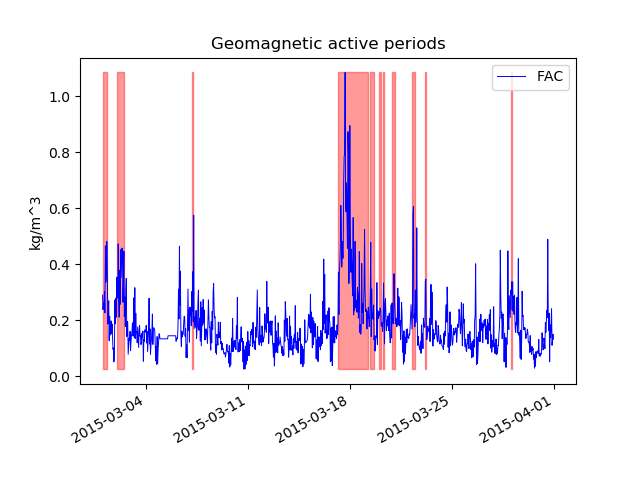

Text(0.5,1,'Geomagnetic active periods')

In [4]:
active = np.ones(len(Half_orbit.Kp))
active[Half_orbit.Kp<4] = float('NaN')
max_dens = max(Half_orbit.FAC)
min_dens = min(Half_orbit.FAC)
plt.figure()

p1 = Half_orbit.FAC.plot( style='b',legend=True,linewidth=0.7)
p1.fill_between(Half_orbit.index,max_dens* active, np.zeros(len(active))+min_dens, color='r', alpha=0.4)
p1.set_ylabel('kg/m^3')
plt.title('Geomagnetic active periods')


<IPython.core.display.Javascript object>


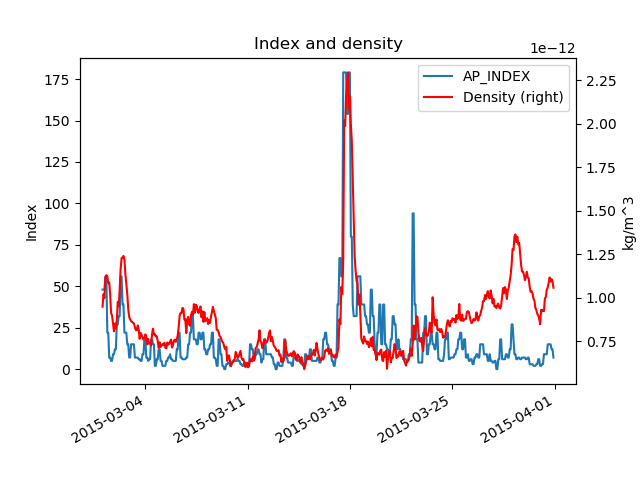

Text(0.5,1,'Index and density')

In [15]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].AP_INDEX.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('Index')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Index and density')

In [11]:
Half_orbit.head()

,FAC_A,FAC_C,ap,Density,Orbit_nr,Hemisphere,AP_INDEX,F10_INDEX,BZ_GSE,DST
2015-03-01 00:45:55,0.394035,0.395206,7.0,9.046159e-13,0.0,-1.0,48.0,125.300003,-0.8,-24.0
2015-03-01 01:32:50,0.327109,0.303314,15.0,9.488591e-13,1.0,1.0,48.0,125.300003,2.4,-34.0
2015-03-01 02:19:45,0.424904,0.420610,15.0,1.010551e-12,1.0,-1.0,48.0,125.300003,0.1,-20.0
2015-03-01 03:06:40,0.278338,0.254515,15.0,1.020605e-12,2.0,1.0,48.0,125.300003,-3.7,-20.0
2015-03-01 03:53:30,0.420675,0.476124,15.0,9.270029e-13,2.0,-1.0,48.0,125.300003,-3.7,-20.0


### Basemap plot of one orbit

In [17]:
orbit_values = FAC[(FAC.Orbit_nr>10) & (FAC.Orbit_nr<16) & (FAC.Hemisphere==1)]
dens_orbit = DNS[(DNS.Orbit_nr>10) & (DNS.Orbit_nr<16)]

<IPython.core.display.Javascript object>


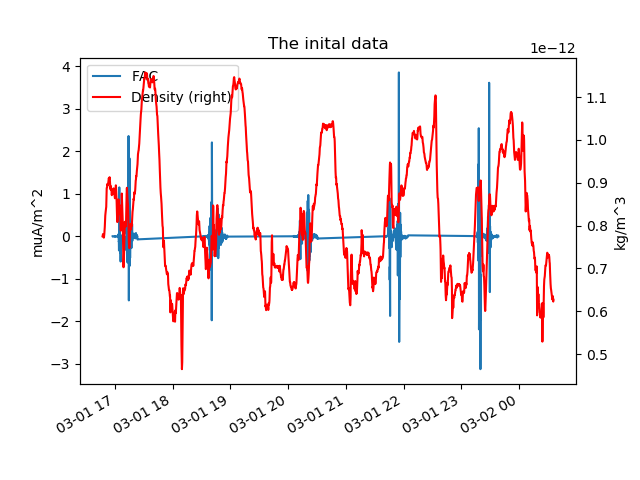

Text(0.5,1,'The inital data')

In [18]:
plt.figure()
p1 = orbit_values.FAC.plot(legend=True)
p2 = dens_orbit.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')


In [19]:
plot_data = orbit_values.rolling(window=20,center=False).mean()

<IPython.core.display.Javascript object>


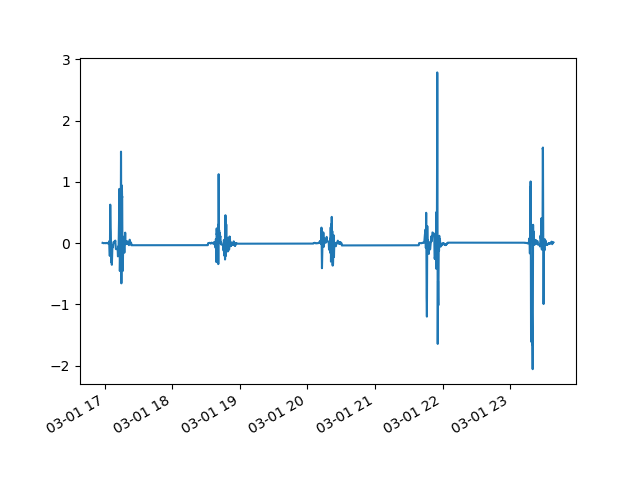

In [20]:
plt.figure()
plot_data.FAC.plot()

<IPython.core.display.Javascript object>


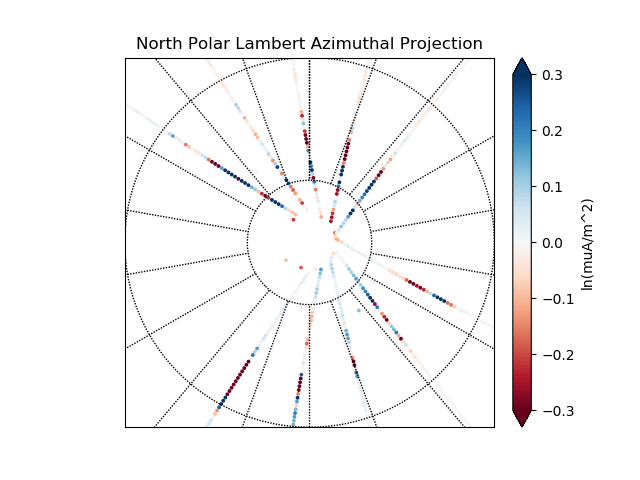

Text(0.5,1,'North Polar Lambert Azimuthal Projection')

In [21]:
rate = 10
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='c')
#m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 3*np.ones(len(plot_data.Longitude.values[::rate]))
colors = plot_data.FAC.values[::rate]
x,y = m(plot_data.Longitude.values[::rate], plot_data.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='RdBu',alpha=1)

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%",extend='both')
plt.clim(-0.3, 0.3);
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")

<IPython.core.display.Javascript object>


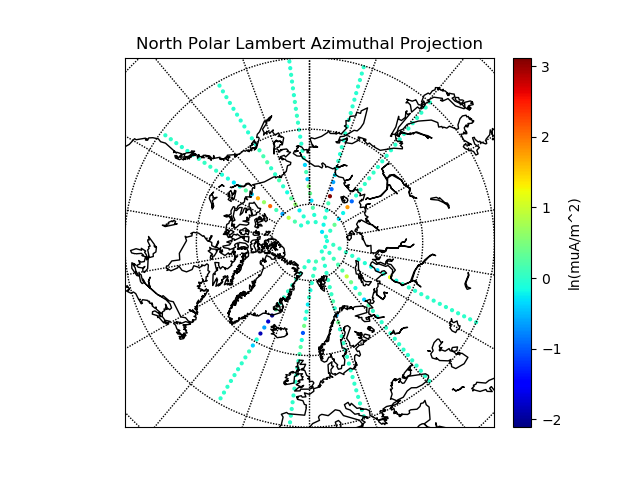

Text(0.5,1,'North Polar Lambert Azimuthal Projection')

In [22]:
rate = 30
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=40,lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 4*np.ones(len(orbit_values.Longitude.values[::rate]))
colors = orbit_values.FAC.values[::rate]
x,y = m(orbit_values.Longitude.values[::rate], orbit_values.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='jet')

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")

### Corrolation

In [25]:
Half_orbit.iloc[:,[0,1,6,4]].corr()

,FAC,Density,F10_INDEX,AP_INDEX
FAC,1.000000,0.575253,-0.153076,0.763837
Density,0.575253,1.000000,0.238567,0.632549
F10_INDEX,-0.153076,0.238567,1.000000,-0.258368
AP_INDEX,0.763837,0.632549,-0.258368,1.000000


In [18]:
len(Half_orbit.FAC_A.values)

951

In [19]:
len(Half_orbit.FAC_A.values[10:-10])

931

<IPython.core.display.Javascript object>


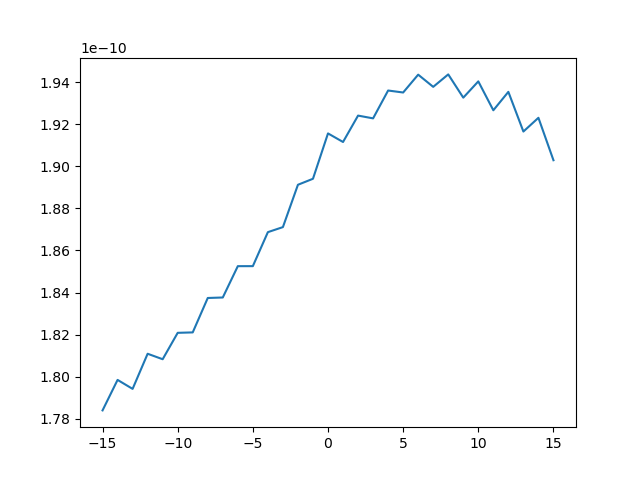

In [21]:
corr_FACA_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_A.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACA_DNS)))-(len(corr_FACA_DNS)-1)/2),corr_FACA_DNS)

<IPython.core.display.Javascript object>


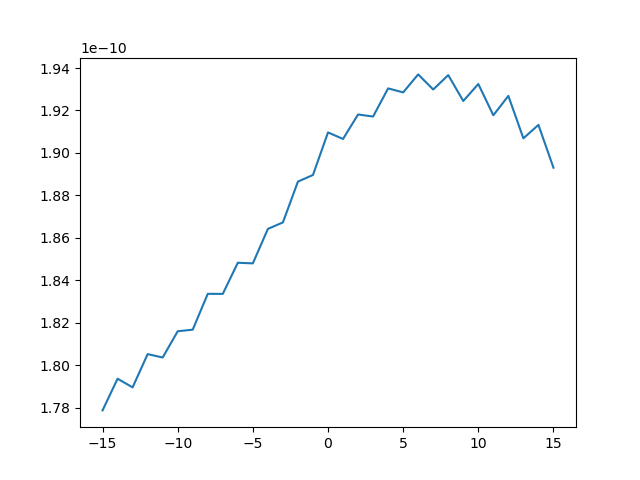

In [22]:
corr_FACC_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACC_DNS)))-(len(corr_FACC_DNS)-1)/2),corr_FACC_DNS)

<IPython.core.display.Javascript object>


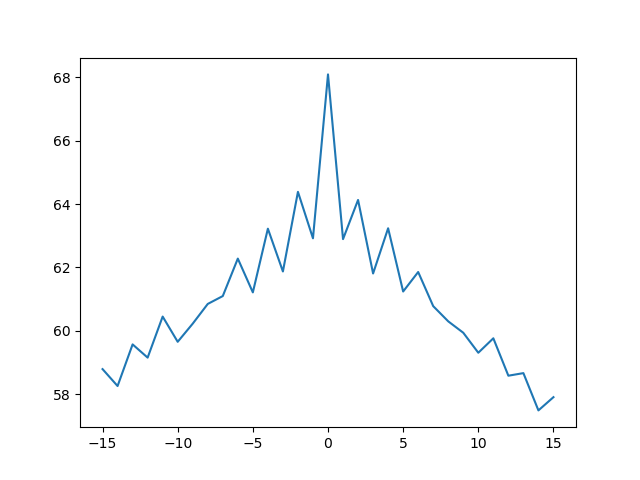

In [23]:
corr_FAC=signal.correlate(Half_orbit.FAC_A.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FAC)))-(len(corr_FAC)-1)/2),corr_FAC)

<IPython.core.display.Javascript object>


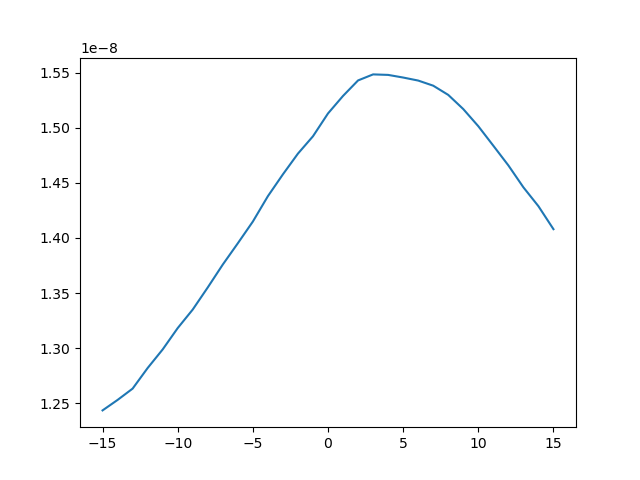

In [24]:
corr_DNS_ap=signal.correlate(Half_orbit.Density.values,Half_orbit.AP_INDEX.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_DNS_ap)))-(len(corr_DNS_ap)-1)/2),corr_DNS_ap)

<IPython.core.display.Javascript object>


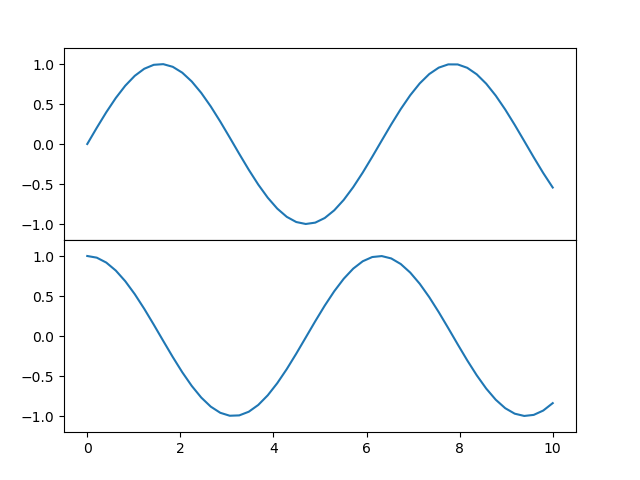

In [44]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(x,np.cos(x));
